# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/caiogomes/miniconda3/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

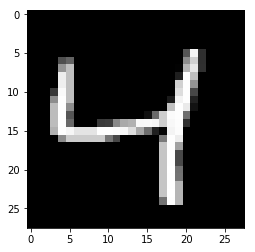

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [10]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name="inputs")
targets_ = tf.placeholder(tf.float32, (None, image_size), name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits) ## Computes the lost at all

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [11]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [12]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6953
Epoch: 1/20... Training loss: 0.6924
Epoch: 1/20... Training loss: 0.6897
Epoch: 1/20... Training loss: 0.6865
Epoch: 1/20... Training loss: 0.6830
Epoch: 1/20... Training loss: 0.6779
Epoch: 1/20... Training loss: 0.6728
Epoch: 1/20... Training loss: 0.6659
Epoch: 1/20... Training loss: 0.6582
Epoch: 1/20... Training loss: 0.6499
Epoch: 1/20... Training loss: 0.6396
Epoch: 1/20... Training loss: 0.6296
Epoch: 1/20... Training loss: 0.6172
Epoch: 1/20... Training loss: 0.6014
Epoch: 1/20... Training loss: 0.5876
Epoch: 1/20... Training loss: 0.5718
Epoch: 1/20... Training loss: 0.5573
Epoch: 1/20... Training loss: 0.5395
Epoch: 1/20... Training loss: 0.5211
Epoch: 1/20... Training loss: 0.5021
Epoch: 1/20... Training loss: 0.4865
Epoch: 1/20... Training loss: 0.4692
Epoch: 1/20... Training loss: 0.4540
Epoch: 1/20... Training loss: 0.4367
Epoch: 1/20... Training loss: 0.4190
Epoch: 1/20... Training loss: 0.4047
Epoch: 1/20... Training loss: 0.3976
E

Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1997
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1997
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1873
E

Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1553
E

Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1272
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1308
E

Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1224
E

Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1178
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1112
E

Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1051
E

Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.0979
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.0993
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.0995
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1001
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1021
E

Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1008
E

Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0959
E

Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0921
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0923
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0903
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0961
E

Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0898
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0895
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0884
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0983
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0894
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0896
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0886
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0996
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0889
Epoch: 17/20... Training loss: 0.0883
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

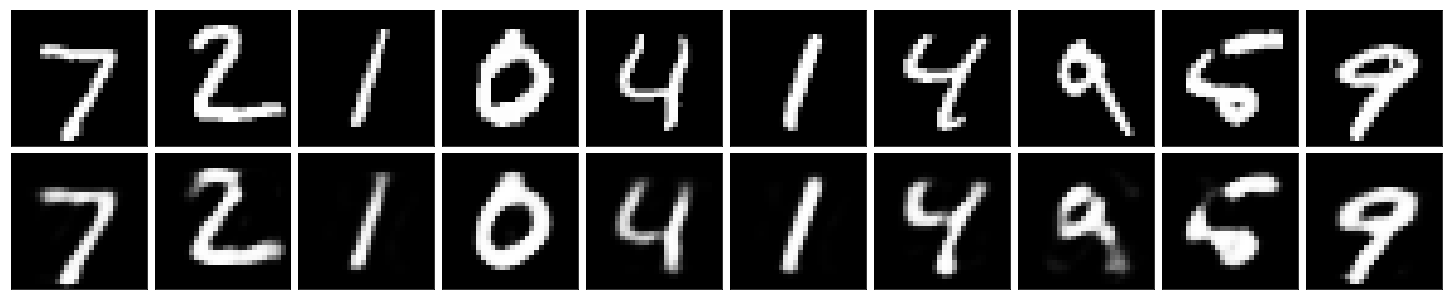

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.